# 1. Importing the necessary liberaries for this assignment

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

# Loading the datasets

In [2]:
Cab_Data_df = pd.read_csv('OneDrive - Ceteris AG\\Desktop\\Data Glacier\\Data-Sets\\Cab_Data.csv')
City_df = pd.read_csv('OneDrive - Ceteris AG\\Desktop\\Data Glacier\\Data-Sets\\City.csv')
Customer_ID_df = pd.read_csv('OneDrive - Ceteris AG\\Desktop\\Data Glacier\\Data-Sets\\Customer_ID.csv')
Transaction_ID_df = pd.read_csv('OneDrive - Ceteris AG\\Desktop\\Data Glacier\\Data-Sets\\Transaction_ID.csv')

# Understand the field names and data types

# Cab_Data_df

In [3]:
Cab_Data_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


# Data Types 

In [4]:
Cab_Data_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

After returning the data types of each column in Cab_Data_df, 
we've noticed that the column "Date of Travel" should be changed. 
The array of dates in our example are dates extracted from an excel file, Each represents the days after the base_date (on/about 1899-12-29).

In [5]:
new_list = Cab_Data_df["Date of Travel"].to_list()

new_base = pd.Timestamp("1900-12-29")  

new_dates = [
    new_base + pd.DateOffset(date_offset) 
    for date_offset in new_list
]

Cab_Data_df["Date of Travel"] = pd.to_datetime(new_dates, format='%y/%m/%d')


In [6]:
print("Min. date is: ", Cab_Data_df["Date of Travel"].min())
print("Max. date is: ", Cab_Data_df["Date of Travel"].max())

Min. date is:  2016-12-31 00:00:00
Max. date is:  2019-12-30 00:00:00


Stripping date fields from 00:00:00

In [7]:
Cab_Data_df["Date of Travel"] = Cab_Data_df["Date of Travel"].dt.strftime("%Y-%m-%d")

In [8]:
Cab_Data_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2017-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2017-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-12-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2017-01-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2017-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Data Details: 
  number of rows / number of columns

In [9]:
nr_rows = Cab_Data_df.shape[0]
nr_col = Cab_Data_df.shape[1]
print("Number of rows", nr_rows)
print("Number of columns", nr_col)

Number of rows 359392
Number of columns 7


  number of companies / cities

In [10]:
print("Number of Companies within Cab_Data", Cab_Data_df["Company"].unique())
print("Number of cities within Cab_Data", Cab_Data_df["City"].unique())

Number of Companies within Cab_Data ['Pink Cab' 'Yellow Cab']
Number of cities within Cab_Data ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


Generating descriptive statistics about the data (count, mean, standard deviation, minimum, quantile and max).

In [11]:
Cab_Data_df[["KM Travelled", "Price Charged", "Cost of Trip"]].describe().round()

,KM Travelled,Price Charged,Cost of Trip
count,359392.0,359392.0,359392.0
mean,23.0,423.0,286.0
std,12.0,274.0,158.0
min,2.0,16.0,19.0
25%,12.0,206.0,151.0
50%,22.0,386.0,282.0
75%,33.0,584.0,414.0
max,48.0,2048.0,691.0


# City_df

# Data Info

In [12]:
City_df.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
City_df.dtypes

City          object
Population    object
Users         object
dtype: object

After returning the data types for City_df, we see that we need to change the data types of both Population and Users from object to float64.

In [14]:
City_df["Population"] = City_df["Population"].str.replace(",", "").astype(int)

In [15]:
City_df["Population"] = City_df["Population"].astype(float)

In [16]:
City_df["Users"] = City_df["Users"].str.replace(",", "").astype(int)
City_df["Users"] = City_df["Users"].astype(float)

In [17]:
City_df.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [18]:
City_df.head(5)

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


In [19]:
City_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


# Customer_ID_df

In [20]:
Customer_ID_df.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [21]:
Customer_ID_df.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [22]:
Customer_ID_df[["Age", "Income (USD/Month)"]].describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


# Transaction_ID_df

In [23]:
Transaction_ID_df.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [24]:
Transaction_ID_df.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

# Merge the data sets

In [25]:
df_merge1 = Cab_Data_df.merge(Transaction_ID_df, on = "Transaction ID")
df_merge1

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2017-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,2017-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,2016-12-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,2017-01-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,2017-01-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,2019-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,2019-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,2019-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,2019-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [26]:
df_merge2 = df_merge1.merge(Customer_ID_df, on = "Customer ID")
df_merge2.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2017-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2019-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2019-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2017-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2019-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [27]:
df_master_data = df_merge2.merge(City_df, on = "City")
df_master_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2017-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2019-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2019-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2017-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2019-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


We create a new column for Profit "Price Charged - Cost of Trip"

In [28]:
df_master_data["Profit"] = df_master_data["Price Charged"] - df_master_data["Cost of Trip"]
df_master_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
0,10000011,2017-01-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0,57.3150
1,10351127,2019-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,281.2772
2,10412921,2019-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0,194.6480
3,10000012,2017-01-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0,23.6660
4,10320494,2019-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0,253.9808


# Finding duplicates 

In [29]:
df_master_data.duplicated().describe()

count     359392
unique         1
top        False
freq      359392
dtype: object

The result is a boolean Series with the value True denoting duplicate. In other words, 
the value True means the entry is identical to a previous one, in our example we only have False values. 

# Checking for NULL values / Cleaning the data

In [30]:
df_master_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit                0
dtype: int64

# Generating descriptive statistics about the master data (count, mean, standard deviation, minimum, quantile and max).

In [31]:
df_master_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000


In [32]:
df_master_data.dtypes

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population            float64
Users                 float64
Profit                float64
dtype: object

No NULL values are available in our newly merged data set.

# Relationship analysis / Heatmap base using SNS so that we can find insights much quicker 

In [33]:
correlation = df_master_data.corr()
correlation

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Profit
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526,-0.087130
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428,0.462768
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061,0.864154
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628,0.486056
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742,-0.306527
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906,-0.005093
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464,0.006148
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490,0.544079
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000,0.457758
Profit,-0.087130,0.462768,0.864154,0.486056,-0.306527,-0.005093,0.006148,0.544079,0.457758,1.000000


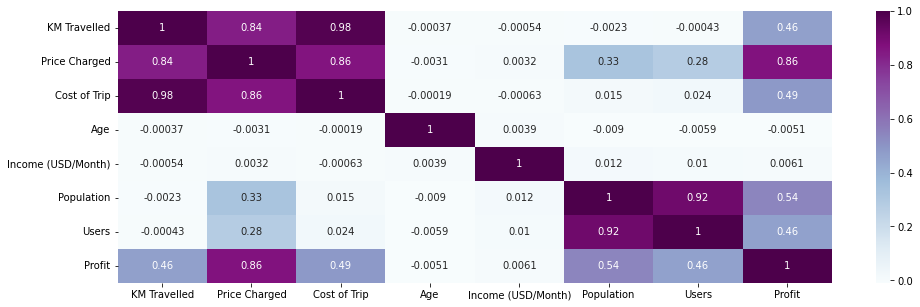

In [34]:
plt.figure(figsize = (16,5))
heatmap_master = sns.heatmap(df_master_data[["KM Travelled", "Price Charged", "Cost of Trip", "Age", "Income (USD/Month)", "Population", "Users", "Profit"]].corr(), cmap="BuPu", annot = True)
plt.show()

We can conclude from the executed heatmap on our master data, that there's a strong positive correlation between the variables "KM Travelled", "Price Charged" and "Cost of Trip", also there is a strong positive correlation between "Users" and "Population".
There's also a strog correlation between "Price Charged" and "Profit", which is normal in real life situations. 
We can also conclude that "Age" does not correlate to higher "Income(USD/Month)" 

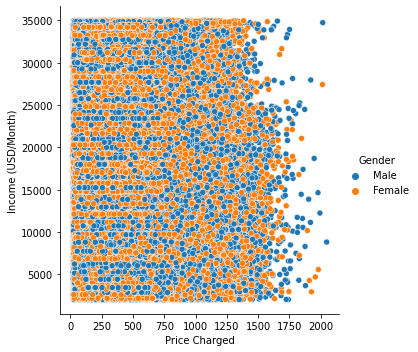

In [35]:
sns.relplot(x = "Price Charged", y = "Income (USD/Month)", hue = "Gender", data = df_master_data)

C:\Users\mshullar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

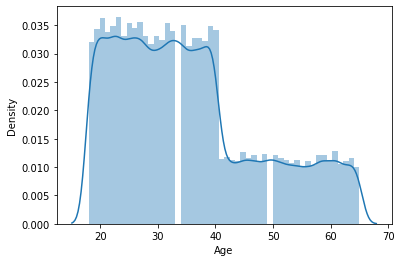

In [36]:
sns.distplot(df_master_data["Age"])

C:\Users\mshullar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price Charged', ylabel='Density'>

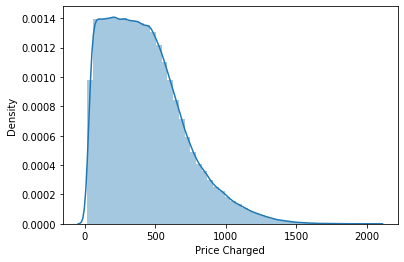

In [37]:
sns.distplot(df_master_data["Price Charged"])

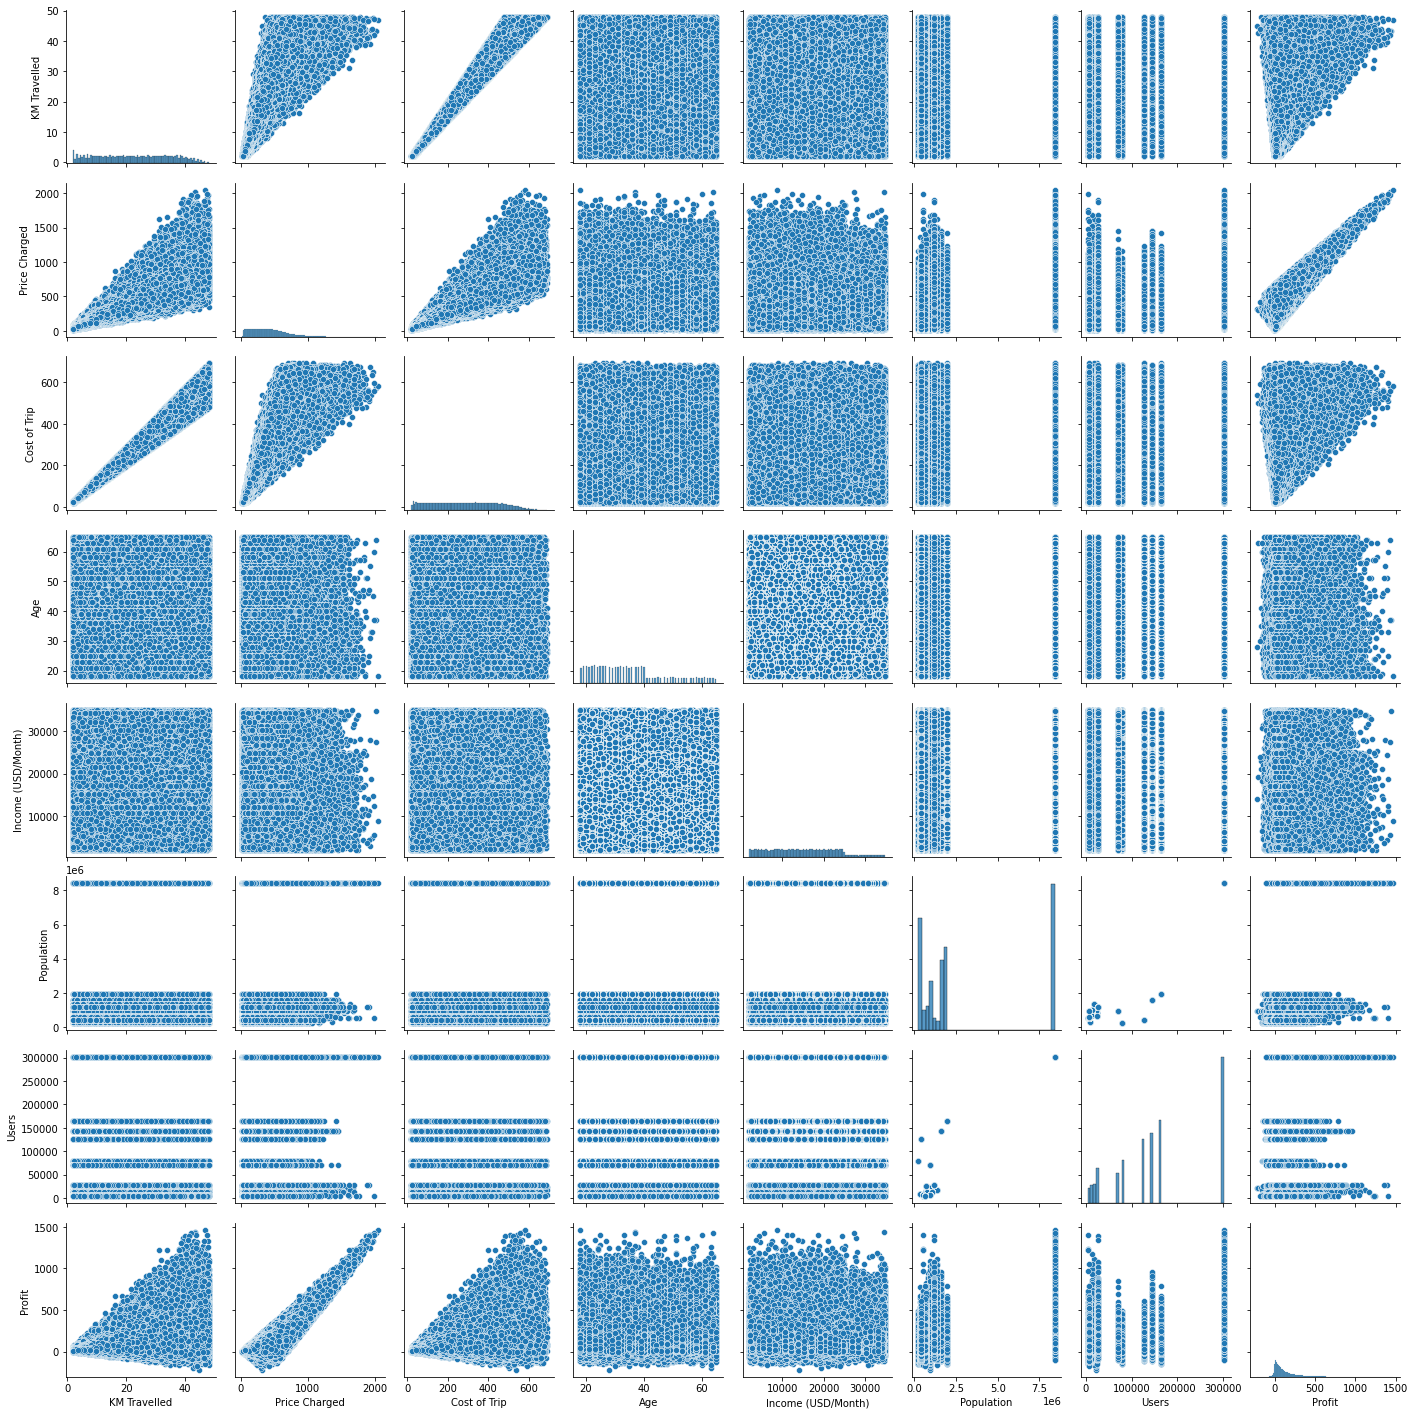

In [41]:
sns.pairplot(data = df_master_data[["KM Travelled", "Price Charged", "Cost of Trip", "Age", 
                                  "Income (USD/Month)", "Population", "Users", "Profit"]])
plt.show()

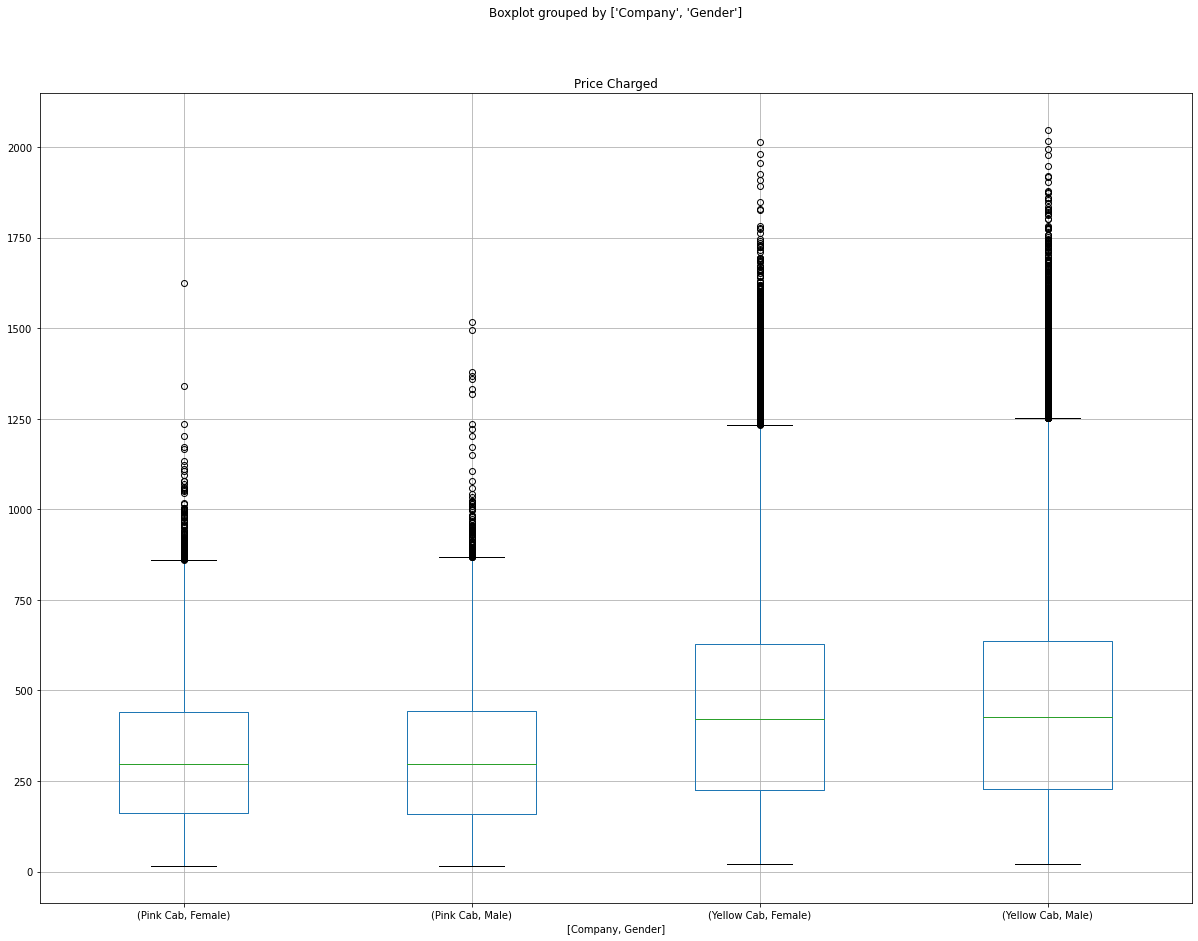

In [52]:
df_master_data.boxplot(column = "Price Charged", by=["Company", "Gender"], figsize = (20, 15))
plt.show()

We conclude from this boxplot that Yellow Cab's prices are higher than Pink Cab's drivers and male taxi drivers at Yellow Cab demand higher taxi fares than female drivers at the same company.

In [55]:
df_master_data.info

<bound method DataFrame.info of         Transaction ID Date of Travel     Company           City  \
0             10000011     2017-01-06    Pink Cab     ATLANTA GA   
1             10351127     2019-07-20  Yellow Cab     ATLANTA GA   
2             10412921     2019-11-22  Yellow Cab     ATLANTA GA   
3             10000012     2017-01-04    Pink Cab     ATLANTA GA   
4             10320494     2019-04-20  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10307228     2019-03-02  Yellow Cab  WASHINGTON DC   
359388        10319775     2019-04-12  Yellow Cab  WASHINGTON DC   
359389        10347676     2019-07-05  Yellow Cab  WASHINGTON DC   
359390        10358624     2019-08-01  Yellow Cab  WASHINGTON DC   
359391        10370709     2019-08-29  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         C

We will continue exploring our categorical data e.g., Payment_Mode, Age, Gender, Price Charged, Company, City

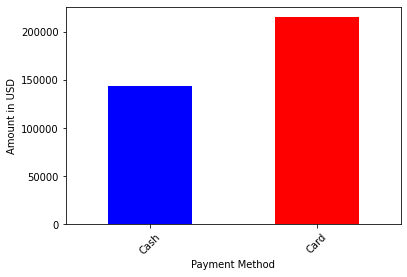

In [59]:
df_master_data["Payment_Mode"].value_counts(ascending=True).plot(kind='bar', color=["blue", "red"], rot=45)
plt.xlabel("Payment Method")
plt.ylabel("Amount in USD")
plt.show()

More customer pay with card than cash.

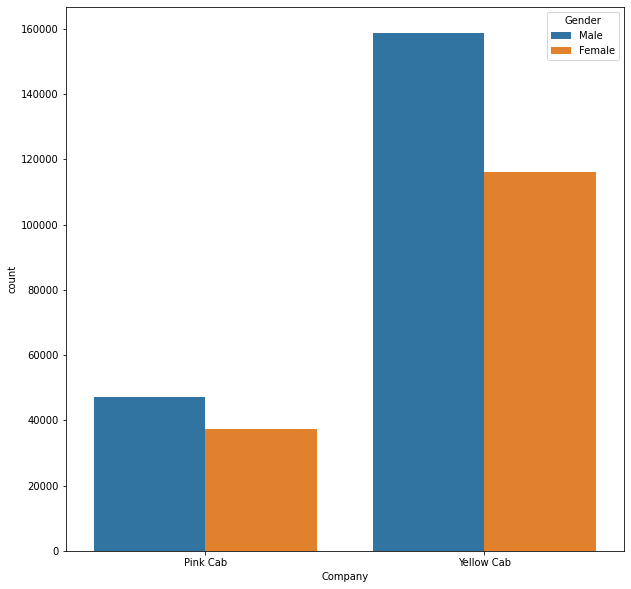

In [66]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(x = "Company", hue = "Gender", data = df_master_data)
plt.show()

Areas to investigate 
Which company has maximum cab users at a particular time period?

In [127]:
df_master_data[["Year", "Month", "Day"]] = df_master_data["Date of Travel"].str.split("-", expand = True)

In [154]:
YellowCabRevenue = df_master_data[df_master_data.Company == "Yellow Cab"].groupby("Year").Profit.mean()
PinkCabRevenue = df_master_data[df_master_data.Company == "Pink Cab"].groupby("Year").Profit.mean()

In [155]:
YellowCabRevenue

Year
2016    323.540294
2017    169.433564
2018    168.416894
2019    143.450759
Name: Profit, dtype: float64

In [156]:
PinkCabRevenue

Year
2016    117.302951
2017     68.732103
2018     66.714142
2019     53.124295
Name: Profit, dtype: float64

In [172]:
monthv = df_master_data.groupby(["Month"])["Company"].count()
monthv

Month
01    22211
02    18221
03    21744
04    21675
05    23832
06    24476
07    27659
08    32389
09    37003
10    39975
11    43933
12    46274
Name: Company, dtype: int64

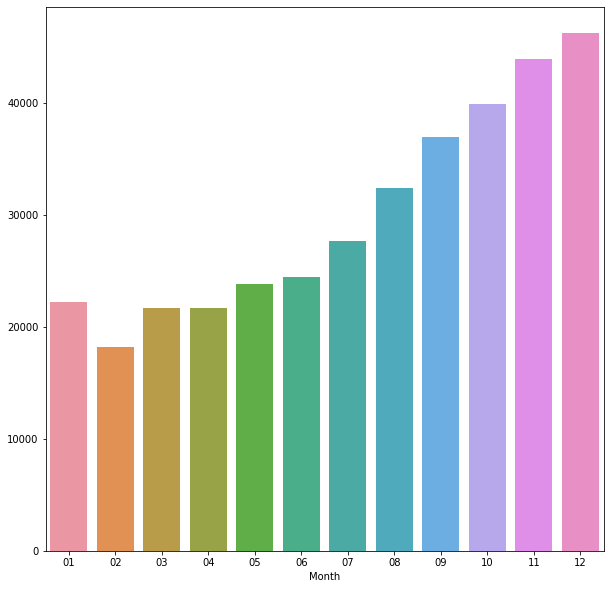

In [180]:
plt.figure(figsize = (10,10))
sns.barplot(x = monthv.index, y = monthv.values)
plt.show()

Does margin proportionally increase with increase in number of customers?

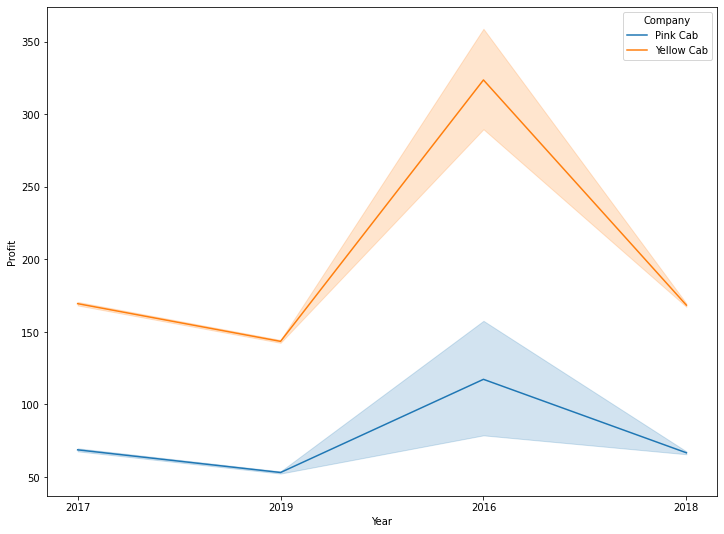

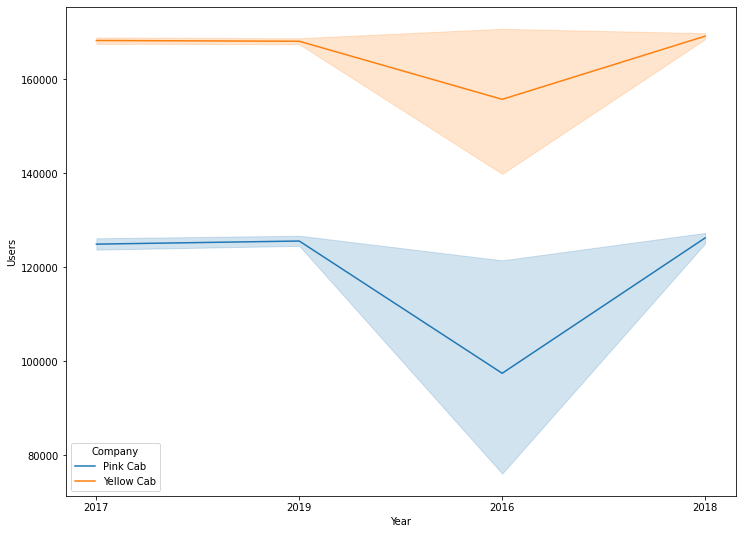

In [179]:
plt.figure(figsize = (12, 9))
sns.lineplot(x = "Year", y = "Profit", hue = "Company", data = df_master_data)

plt.figure(figsize = (12, 9))
sns.lineplot(x = "Year", y = "Users", hue = "Company", data = df_master_data)

plt.show()

As we can see here, margin does not proportionally increase with increase in number of customer in both taxi companies.

What are the attributes of these customer segments? gender, age, payment method and city

In [188]:
yearly_cal = df_master_data.groupby(["Year","Company"])["Users"].count().to_frame()
yearly_cal

Users
Year Company          
2016 Pink Cab       41
     Yellow Cab    140
2017 Pink Cab    25244
     Yellow Cab  82797
2018 Pink Cab    30205
     Yellow Cab  97759
2019 Pink Cab    29221
     Yellow Cab  93985

In [189]:
gender_cal = df_master_data.groupby(["Gender","Company"])["Users"].count().to_frame()
gender_cal

Users
Gender Company           
Female Pink Cab     37480
       Yellow Cab  116000
Male   Pink Cab     47231
       Yellow Cab  158681

In [190]:
city_cal = df_master_data.groupby(["City","Company"])["Users"].count().to_frame()
city_cal

Users
City           Company          
ATLANTA GA     Pink Cab     1762
               Yellow Cab   5795
AUSTIN TX      Pink Cab     1868
               Yellow Cab   3028
BOSTON MA      Pink Cab     5186
               Yellow Cab  24506
CHICAGO IL     Pink Cab     9361
               Yellow Cab  47264
DALLAS TX      Pink Cab     1380
               Yellow Cab   5637
DENVER CO      Pink Cab     1394
               Yellow Cab   2431
LOS ANGELES CA Pink Cab    19865
               Yellow Cab  28168
MIAMI FL       Pink Cab     2002
               Yellow Cab   4452
NASHVILLE TN   Pink Cab     1841
               Yellow Cab   1169
NEW YORK NY    Pink Cab    13967
               Yellow Cab  85918
ORANGE COUNTY  Pink Cab     1513
               Yellow Cab   2469
PHOENIX AZ     Pink Cab      864
               Yellow Cab   1200
PITTSBURGH PA  Pink Cab      682
               Yellow Cab    631
SACRAMENTO CA  Pink Cab     1334
               Yellow Cab   1033
SAN DIEGO CA   Pink Cab    10672
               Yellow Cab   9816
SEATTLE WA     Pink Cab     2732
               Yellow Cab   5265
SILICON VALLEY Pink Cab     3797
               Yellow Cab   4722
TUCSON AZ      Pink Cab      799
               Yellow Cab   1132
WASHINGTON DC  Pink Cab     3692
               Yellow Cab  40045

<AxesSubplot:xlabel='Users', ylabel='City'>

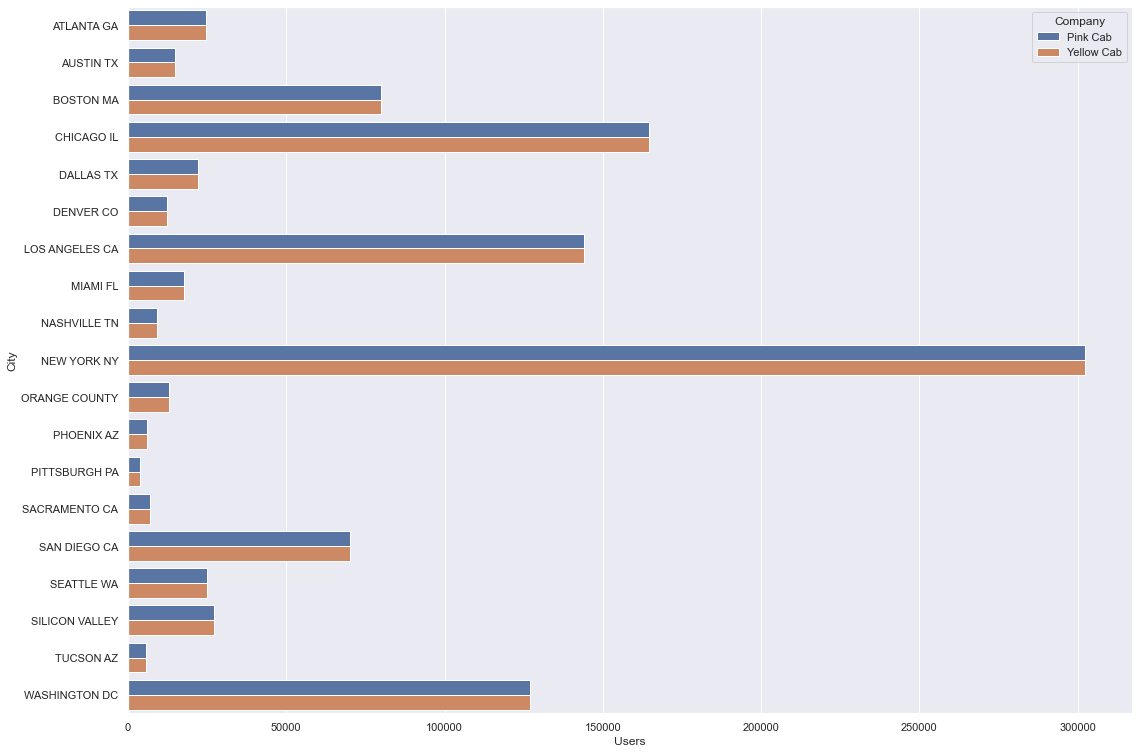

In [194]:
city_users = sns.barplot(x="Users", y="City", data = df_master_data , hue='Company')
city_users

<AxesSubplot:xlabel='Profit', ylabel='City'>

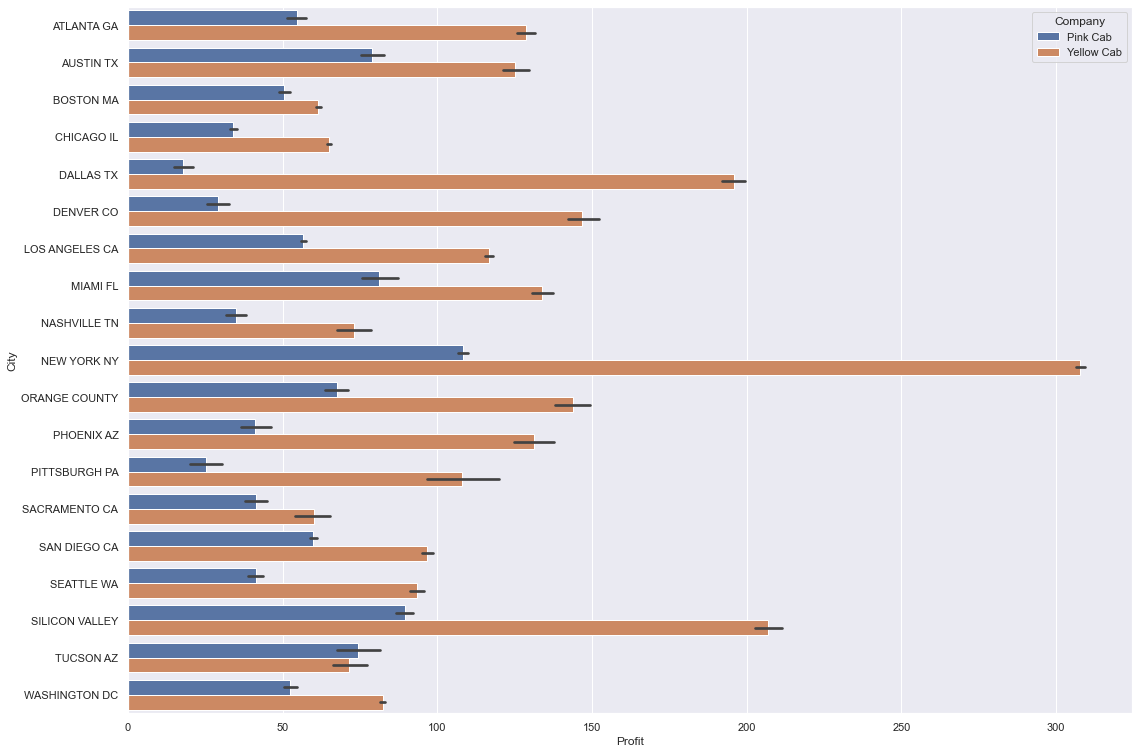

In [201]:
profit_cal = sns.barplot(x = "Profit", y = "City", data = df_master_data , hue = "Company")
profit_cal

<AxesSubplot:xlabel='Gender', ylabel='Profit'>

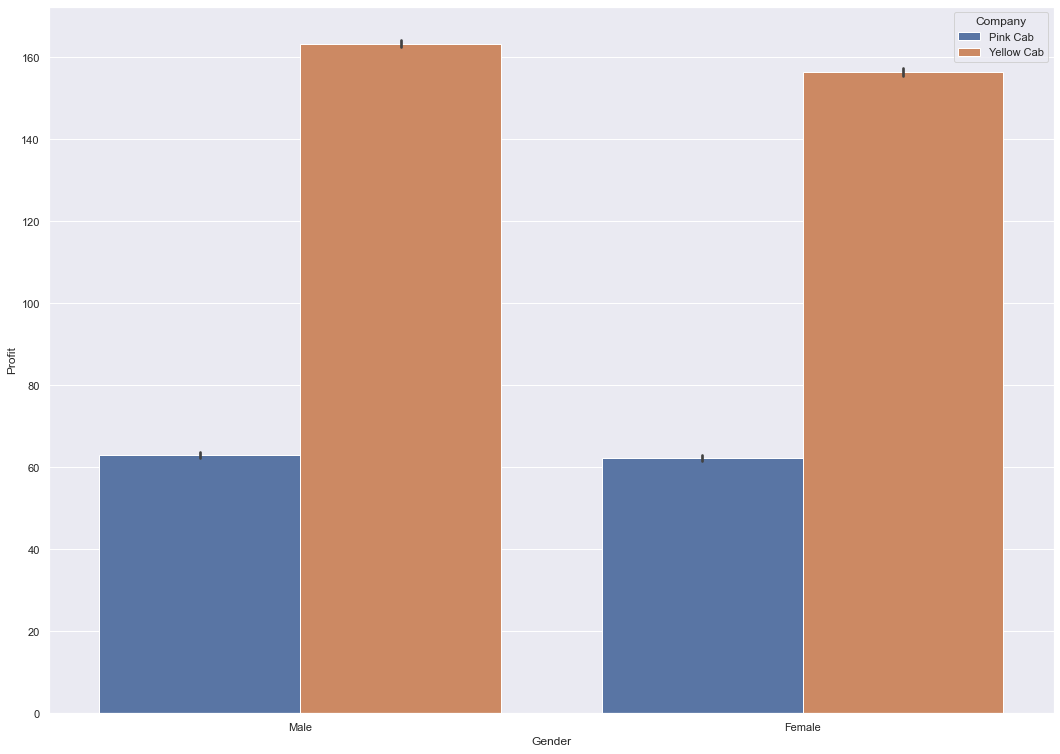

In [200]:
gender_city_cal = sns.barplot(x = "Gender", y = "Profit", data = df_master_data , hue = 'Company')
gender_city_cal

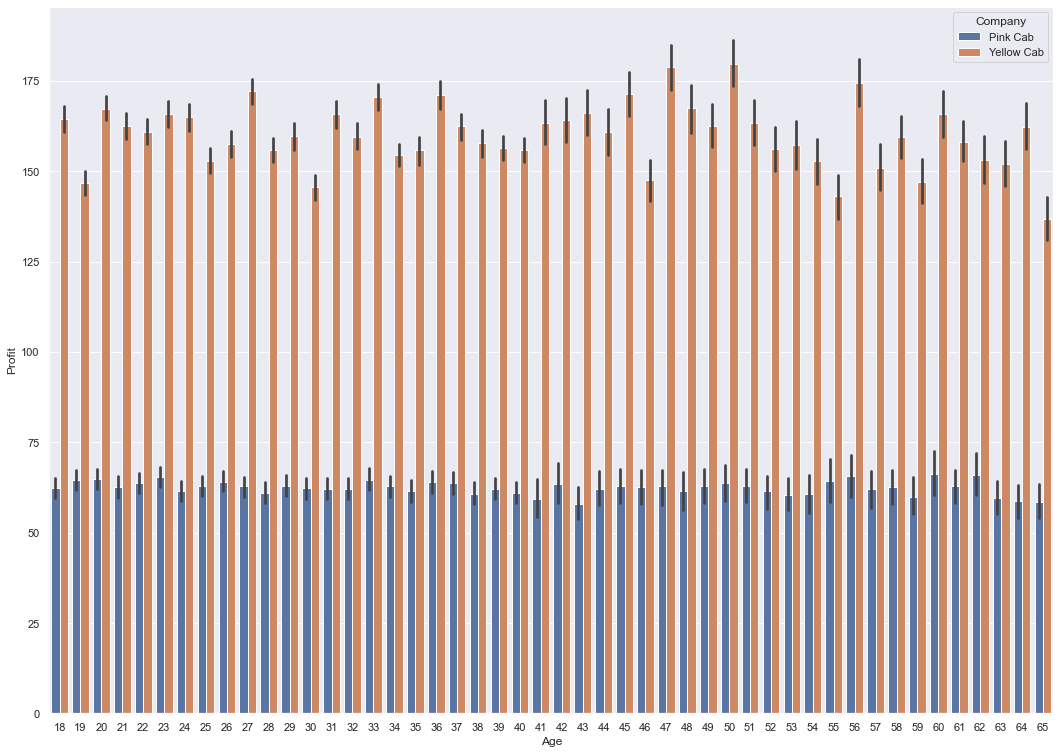

In [202]:
age_cal = sns.barplot(x = "Age", y = "Profit", data = df_master_data , hue = 'Company')
age_cal

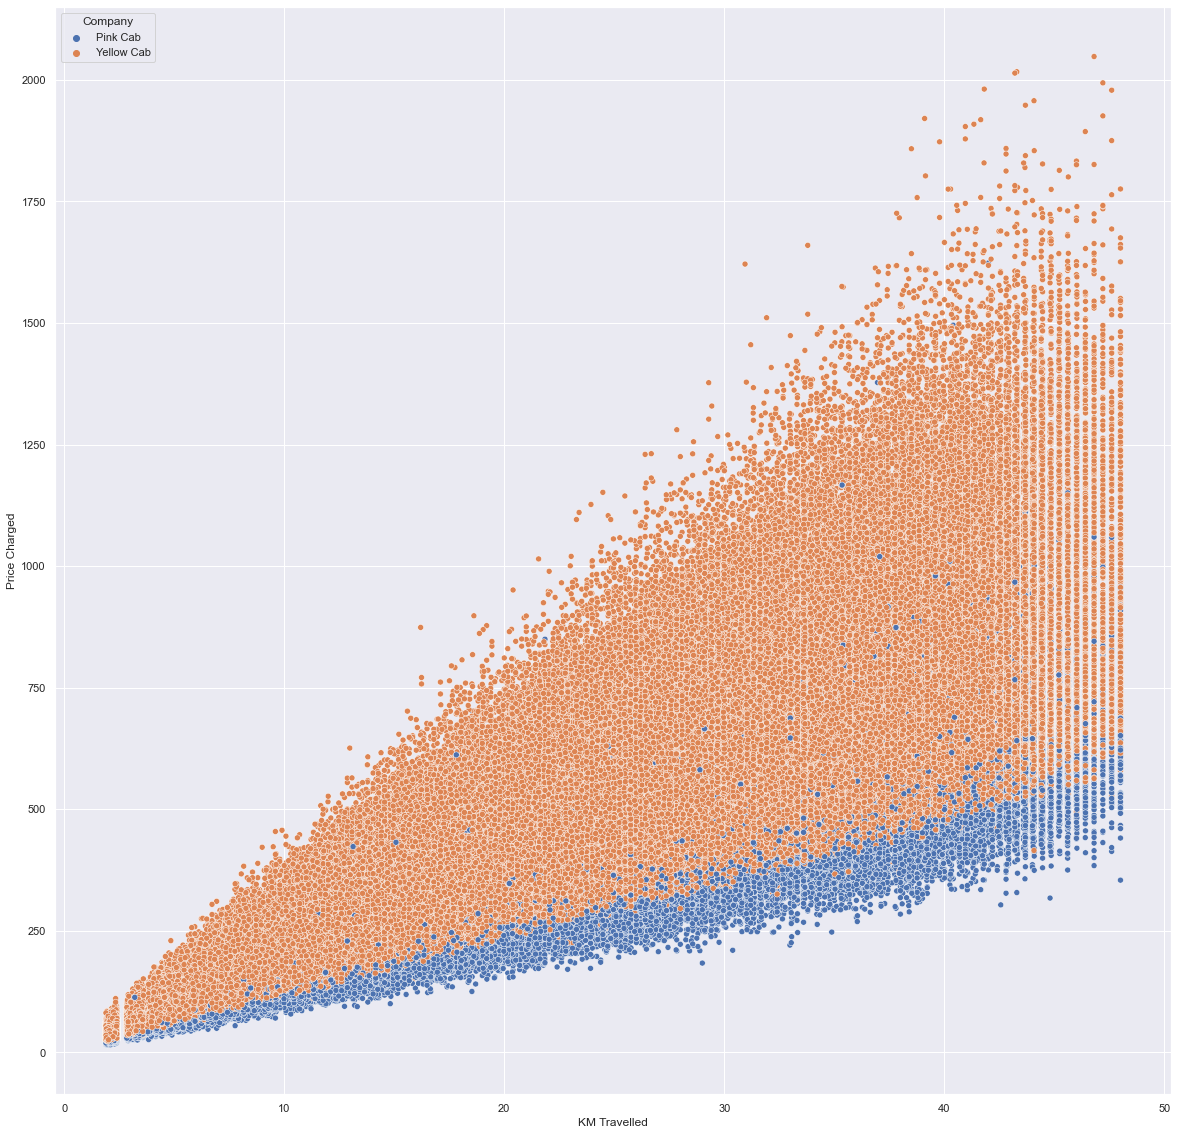

In [208]:
plt.figure(figsize = (20, 20))
km_travelled = sns.scatterplot(x = "KM Travelled", y = "Price Charged", data = df_master_data , hue = 'Company')
plt.show()

# Create multiple hypothesis and investigate:

In [285]:
first = df_master_data[(df_master_data.Month == ("06" and "07" and "08" and "09")) & (df_master_data.Company == "Pink Cab")].groupby("Transaction ID").Profit.mean()

second = df_master_data[(df_master_data.Month == ("12" and "01" and "02" and "03")) & (df_master_data.Company == "Pink Cab")].groupby("Transaction ID").Profit.mean()

print(first.shape[0], second.shape[0])

_, p_value = stats.ttest_ind(first.values,
                             second.values,
                             equal_var=True)

print("P value is ", p_value)

if(p_value < 0.05):
    print("Hypothesis H1 is accepted i.e. there is difference in profit regarding time of the year for Pink Cab company.")
else:
    print("Hypothesis H0 is accepted i.e. there is no difference in profit regarding time of the year for Pink Cab company.")

9647 4228
P value is  2.0442096649570663e-38
Hypothesis H1 is accepted i.e. there is difference in profit regarding time of the year for Pink Cab company.


In [286]:
first = df_master_data[(df_master_data.Month == ("06" and "07" and "08" and "09")) & (df_master_data.Company == "Yellow Cab")].groupby("Transaction ID").Profit.mean()

second = df_master_data[(df_master_data.Month == ("12" and "01" and "02" and "03")) & (df_master_data.Company == "Yellow Cab")].groupby("Transaction ID").Profit.mean()

print(first.shape[0], second.shape[0])

_, p_value = stats.ttest_ind(first.values,
                             second.values,
                             equal_var=True)

print("P value is ", p_value)

if(p_value < 0.05):
    print("Hypothesis H1 is accepted i.e. there is difference in profit regarding time of the year for Yellow Cab company.")
else:
    print("Hypothesis H0 is accepted i.e. there is no difference in profit regarding time of the year for Yellow Cab company.")

27356 17516
P value is  5.4550802023130026e-55
Hypothesis H1 is accepted i.e. there is difference in profit regarding time of the year for Yellow Cab company.


In [287]:
df_master_data["Age"].max()

65

In [289]:
first = df_master_data[(df_master_data.Age > 65) & (df_master_data.Company == "Pink Cab")].groupby("Transaction ID").Profit.mean()

second = df_master_data[(df_master_data.Age < 65) & (df_master_data.Company == "Pink Cab")].groupby("Transaction ID").Profit.mean()

print(first.shape[0], second.shape[0])

_, p_value = stats.ttest_ind(first.values,
                             second.values,
                             equal_var=True)

print("P value is ", p_value)

if(p_value < 0.05):
    print("Hypothesis H1 is accepted i.e. there is difference in profit regarding age for Pink Cab company.")
else:
    print("Hypothesis H0 is accepted i.e. there is no difference in profit regarding age for Pink Cab company.")

0 83890
P value is  nan
Hypothesis H0 is accepted i.e. there is no difference in profit regarding age for Pink Cab company.


In [290]:
first = df_master_data[(df_master_data.Age > 65) & (df_master_data.Company == "Yellow Cab")].groupby("Transaction ID").Profit.mean()

second = df_master_data[(df_master_data.Age < 65) & (df_master_data.Company == "Yellow Cab")].groupby("Transaction ID").Profit.mean()

print(first.shape[0], second.shape[0])

_, p_value = stats.ttest_ind(first.values,
                             second.values,
                             equal_var=True)

print("P value is ", p_value)

if(p_value < 0.05):
    print("Hypothesis H1 is accepted i.e. there is difference in profit regarding age for Yellow Cab company.")
else:
    print("Hypothesis H0 is accepted i.e. there is no difference in profit regarding age for Yellow Cab company.")

0 272123
P value is  nan
Hypothesis H0 is accepted i.e. there is no difference in profit regarding age for Yellow Cab company.


In [291]:
first = df_master_data[(df_master_data.Gender == "Male") & (df_master_data.Company == "Pink Cab")].groupby("Transaction ID").Profit.mean()

second = df_master_data[(df_master_data.Age == "Female") & (df_master_data.Company == "Pink Cab")].groupby("Transaction ID").Profit.mean()

print(first.shape[0], second.shape[0])

_, p_value = stats.ttest_ind(first.values,
                             second.values,
                             equal_var=True)

print("P value is ", p_value)

if(p_value < 0.05):
    print("Hypothesis H1 is accepted i.e. there is difference in profit regarding gender for Pink Cab company.")
else:
    print("Hypothesis H0 is accepted i.e. there is no difference in profit regarding gender for Pink Cab company.")

47231 0
P value is  nan
Hypothesis H0 is accepted i.e. there is no difference in profit regarding gender for Pink Cab company.


In [292]:
first = df_master_data[(df_master_data.Gender == "Male") & (df_master_data.Company == "Yellow Cab")].groupby("Transaction ID").Profit.mean()

second = df_master_data[(df_master_data.Gender == "Female") & (df_master_data.Company == "Yellow Cab")].groupby("Transaction ID").Profit.mean()

print(first.shape[0], second.shape[0])

_, p_value = stats.ttest_ind(first.values,
                             second.values,
                             equal_var=True)

print("P value is ", p_value)

if(p_value < 0.05):
    print("Hypothesis H1 is accepted i.e. there is difference in profit regarding gender for Yellow Cab company.")
else:
    print("Hypothesis H0 is accepted i.e. there is no difference in profit regarding gender for Yellow Cab company.")

158681 116000
P value is  6.060473042494144e-25
Hypothesis H1 is accepted i.e. there is difference in profit regarding gender for Yellow Cab company.
